# RTI CDS Analytics Exercise 02

## Javad Roostaei, June 2020

This exercise has been done using python and Jupyter notebook. 

# Part 1: Working on the XML file

## Step 0: Loading the XML file and Converting it to a Panda dataframe

In [1]:
# Loading necessary Python Libraries
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

# libraries for plotting 
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline

# libraries for mapping
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

In [2]:
import os
	
# Change work directory
os.chdir(r"D:\RTI_Exercise\data-scientist-exercise02-master\data") #You need to change this to your local folder
print("Current Working Directory " , os.getcwd())

Current Working Directory  D:\RTI_Exercise\data-scientist-exercise02-master\data


In [3]:
# reading and parsing XML Section
tree = ET.parse('AviationData.xml')
root = tree.getroot()
print(root)

<Element '{http://www.ntsb.gov}DATA' at 0x000001DAEBE08CC8>


In [4]:
Xml_Data = [] # empty list to store the rows

# For loop to go through each row and append the empty list
for row in root[0]: 
    Xml_Data.append(row.attrib)
    
# Make pandas DataFrame
AviationData_df = pd.DataFrame(Xml_Data)

# Check the shape of the data
AviationData_df.shape

(77257, 31)

## Step 1: Evaluate the dataset and define the data type

In [5]:
# Show the first five rows of the data frame
AviationData_df.head()

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,PurposeOfFlight,AirCarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate
0,20150901X74304,Accident,GAA15CA244,09/01/2015,"Truckee, CA",United States,,,,,...,,,,,,,,,Preliminary,
1,20150901X92332,Accident,CEN15LA392,08/31/2015,"Houston, TX",United States,29.809444,-95.668889,IWS,WEST HOUSTON,...,Instructional,,,,,2,VMC,LANDING,Preliminary,09/04/2015
2,20150902X61853,Accident,GAA15CA246,08/30/2015,"New Milford, CT",United States,,,,,...,,,,,,,,,Preliminary,
3,20150901X02521,Accident,GAA15CA243,08/30/2015,"New Enterprise, PA",United States,,,,,...,,,,,,,,,Preliminary,
4,20150831X61356,Accident,GAA15CA242,08/29/2015,"MIDLOTHIAN, TX",United States,,,,,...,,,,,,,,,Preliminary,


In [6]:
print(AviationData_df.columns)

# Store columns as a list
col_list = list(AviationData_df.columns)

Index(['EventId', 'InvestigationType', 'AccidentNumber', 'EventDate',
       'Location', 'Country', 'Latitude', 'Longitude', 'AirportCode',
       'AirportName', 'InjurySeverity', 'AircraftDamage', 'AircraftCategory',
       'RegistrationNumber', 'Make', 'Model', 'AmateurBuilt',
       'NumberOfEngines', 'EngineType', 'FARDescription', 'Schedule',
       'PurposeOfFlight', 'AirCarrier', 'TotalFatalInjuries',
       'TotalSeriousInjuries', 'TotalMinorInjuries', 'TotalUninjured',
       'WeatherCondition', 'BroadPhaseOfFlight', 'ReportStatus',
       'PublicationDate'],
      dtype='object')


In [7]:
# replace empty values with numpy nan
AviationData_df = AviationData_df.replace('',np.nan)

In [8]:
# Convert date variables to a correct format
AviationData_df['EventDate'] = pd.to_datetime(AviationData_df['EventDate'],format='%m/%d/%Y',errors='coerce')
AviationData_df['PublicationDate'] = pd.to_datetime(AviationData_df['PublicationDate'],format='%m/%d/%Y',errors='coerce')

In [9]:
# Convert numerical variables to a numeric format
numerical_var = ['Latitude','Longitude','NumberOfEngines','TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries','TotalUninjured']
for i in numerical_var:
    AviationData_df[i] = pd.to_numeric(AviationData_df[i], errors='coerce')

In [10]:
# count the number of nan values in each column
print(AviationData_df.isnull().sum())

EventId                     0
InvestigationType           0
AccidentNumber              0
EventDate                   3
Location                   81
Country                   510
Latitude                53496
Longitude               53505
AirportCode             33780
AirportName             29926
InjurySeverity            106
AircraftDamage           2384
AircraftCategory        60737
RegistrationNumber       2756
Make                       87
Model                     115
AmateurBuilt              654
NumberOfEngines          3921
EngineType               3209
FARDescription          60592
Schedule                65878
PurposeOfFlight          3598
AirCarrier              73439
TotalFatalInjuries      21466
TotalSeriousInjuries    23513
TotalMinorInjuries      22524
TotalUninjured          11395
WeatherCondition         1989
BroadPhaseOfFlight       6227
ReportStatus                0
PublicationDate         13188
dtype: int64


In [11]:
# count the number of nan values in all dataframe
total_miss = AviationData_df.isnull().sum().sum()
total_miss

549079

In [12]:
# Describe the numerical variables dataset
print(AviationData_df.describe())

           Latitude     Longitude  NumberOfEngines  TotalFatalInjuries  \
count  23761.000000  23752.000000     73336.000000        55791.000000   
mean      37.744819    -93.807654         1.149095            0.788962   
std       12.022069     39.510021         0.463222            6.087442   
min      -78.016945   -193.216667         0.000000            0.000000   
25%       33.416389   -115.134444         1.000000            0.000000   
50%       38.190555    -94.660556         1.000000            0.000000   
75%       42.572223    -81.761944         1.000000            1.000000   
max       89.218056    177.557778        24.000000          349.000000   

       TotalSeriousInjuries  TotalMinorInjuries  TotalUninjured  
count          53744.000000        54733.000000    65862.000000  
mean               0.309895            0.492555        5.716817  
std                1.368488            2.779814       29.052413  
min                0.000000            0.000000        0.000000  
25%

 ## Step2: Present some graphs for the numerical variables 

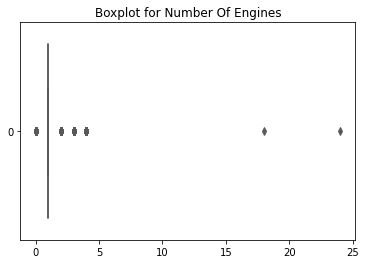

In [17]:
# Make a boxplot for the Number of Engines
ax = sb.boxplot(data=AviationData_df['NumberOfEngines'], orient="h", palette="Set2")
plt.title('Boxplot for Number Of Engines')
plt.savefig('0.Boxplot_NumberOfEngines.png', dpi=300)

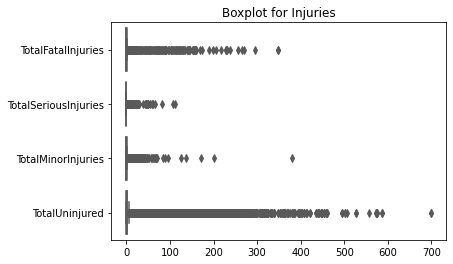

In [18]:
Injuries_vars = AviationData_df[['TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries','TotalUninjured']]
# Make a boxplot for the Injuries variable
ax = sb.boxplot(data=Injuries_vars, orient="h", palette="Set2")
plt.title('Boxplot for Injuries')
plt.savefig('1.Boxplot_Injuries.png', dpi=300)
# This graph show how far the extreme values are from most of the data 

D:\Program Files\Anocando\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Program Files\Anocando\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


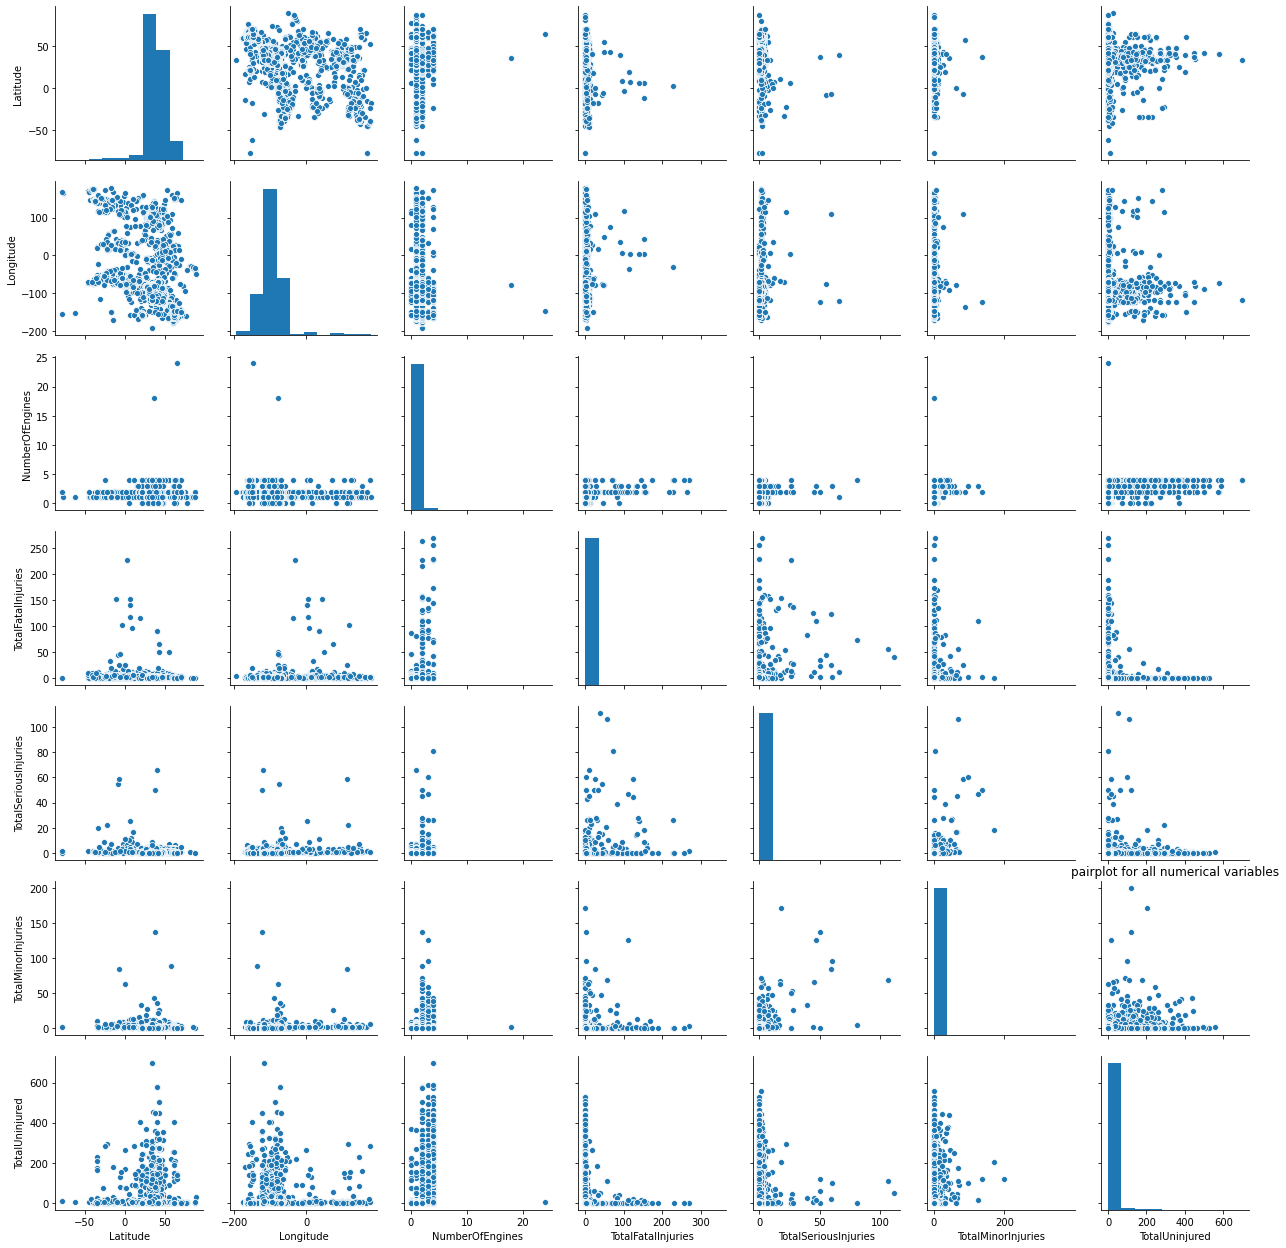

In [19]:
sb.pairplot(AviationData_df)
# Pairplot draw scatterplots for joint relationships and histograms for univariate distributions
# Sometimes it is easy to see by pair plot  how the numerical variables are scattered pairwise 
# Also, we can spot outliers in these types of graphs as well. 
plt.title('pairplot for all numerical variables')
plt.savefig('2.pairplot.png', dpi=800)

### A. First some analysis based on “EventDate” variable

In [20]:
# Drop the three rows in the EventDate Columns with NAN value
AviationData_df = AviationData_df.dropna(subset=['EventDate'])

# Extract years information from the EventDate column and add it to the dataframe
AviationData_df['Flight_Year'] = pd.DatetimeIndex(AviationData_df['EventDate']).year.astype(int)

# Extract months information from the EventDate column and add it to the dataframe
AviationData_df['Flight_Month'] = pd.DatetimeIndex(AviationData_df['EventDate']).month.astype(int)

In [21]:
# Drop years before 1982
AviationData_df2 = AviationData_df[AviationData_df['Flight_Year'] > 1981]
AviationData_df2.shape

(77248, 33)

In [22]:
# create different pivot tables for injuries columns 
TotalFatalInjuries_df = pd.pivot_table(AviationData_df2,index=['Flight_Year'],values=['TotalFatalInjuries'],aggfunc=[np.sum, np.min, np.mean, np.max, len])
TotalSeriousInjuries_df = pd.pivot_table(AviationData_df2,index=['Flight_Year'],values=['TotalSeriousInjuries'],aggfunc=[np.sum, np.min, np.mean, np.max, len])
TotalMinorInjuries_df = pd.pivot_table(AviationData_df2,index=['Flight_Year'],values=['TotalMinorInjuries'],aggfunc=[np.sum, np.min, np.mean, np.max, len])
TotalUninjured_df = pd.pivot_table(AviationData_df2,index=['Flight_Year'],values=['TotalUninjured'],aggfunc=[np.sum, np.min, np.mean, np.max, len])

# Show one of them as a sample
TotalFatalInjuries_df
# len is the number of flight accident recorded in each year

,sum,amin,mean,amax,len
,TotalFatalInjuries,TotalFatalInjuries,TotalFatalInjuries,TotalFatalInjuries,TotalFatalInjuries
Flight_Year,,,,,
1982,1585.0,0.0,0.443481,153.0,3593.0
1983,1273.0,0.0,0.358794,23.0,3556.0
1984,1229.0,0.0,0.356749,17.0,3457.0
1985,1648.0,0.0,0.533852,256.0,3096.0
1986,1180.0,0.0,0.410435,82.0,2880.0
1987,1237.0,0.0,0.439276,156.0,2828.0
1988,1195.0,0.0,0.440147,270.0,2730.0
1989,1532.0,0.0,0.604339,174.0,2544.0


In [23]:
temp_df = pd.DataFrame(TotalFatalInjuries_df['sum'], TotalFatalInjuries_df.index)
temp_df2 = pd.DataFrame(TotalSeriousInjuries_df['sum'], TotalSeriousInjuries_df.index)
temp_df4 = pd.DataFrame(TotalSeriousInjuries_df['len'], TotalSeriousInjuries_df.index)

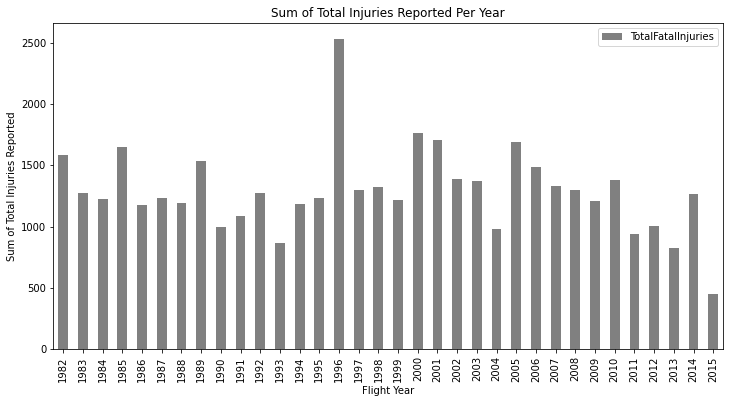

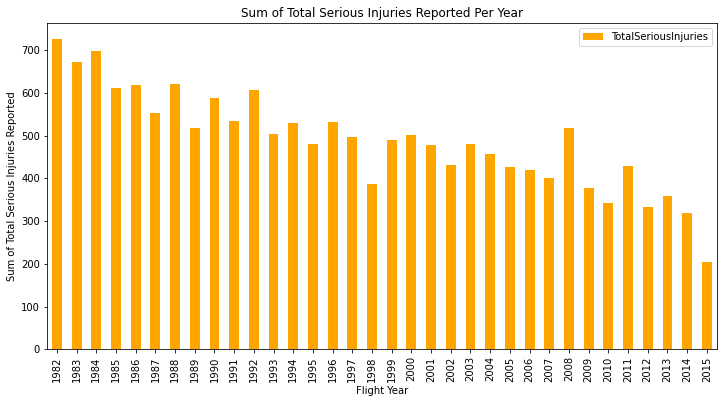

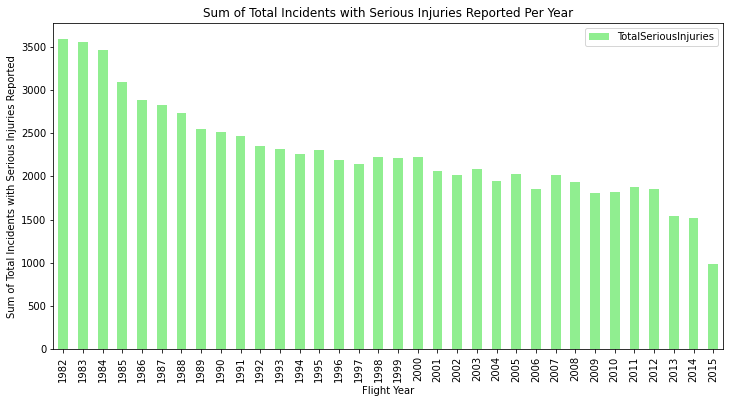

In [24]:
plt.rcParams["figure.figsize"] = [12, 6]

temp_df.plot(kind='bar', color='grey')

plt.xlabel('Flight Year')
plt.ylabel('Sum of Total Injuries Reported')
plt.title('Sum of Total Injuries Reported Per Year')
plt.legend()
plt.savefig('3.Injuries.png', dpi=300)

temp_df2.plot(kind='bar', color='orange')

plt.xlabel('Flight Year')
plt.ylabel('Sum of Total Serious Injuries Reported')
plt.title('Sum of Total Serious Injuries Reported Per Year')
plt.legend()
plt.savefig('4.SeriousInjuries.png', dpi=300)


temp_df4.plot(kind='bar', color='lightgreen')

plt.xlabel('Flight Year')
plt.ylabel('Sum of Total Incidents with Serious Injuries Reported')
plt.title('Sum of Total Incidents with Serious Injuries Reported Per Year')
plt.legend()
plt.savefig('5.IncidentSeriousInjuries.png', dpi=300)

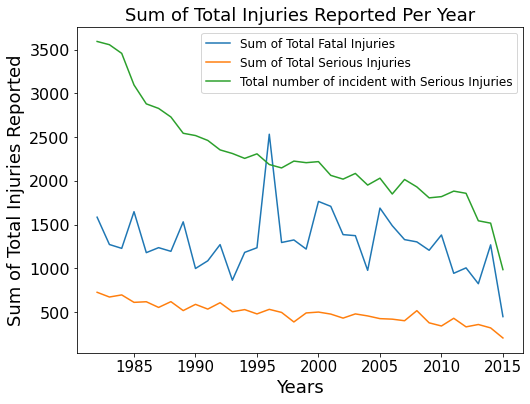

In [25]:
plt.rcParams["figure.figsize"] = [8, 6]
# Create a line plot for counting the injuries (fatal and non-fatal) in each year 
plt.plot(TotalFatalInjuries_df.index, TotalFatalInjuries_df['sum'], label='Sum of Total Fatal Injuries')
plt.plot(TotalSeriousInjuries_df.index, TotalSeriousInjuries_df['sum'], label='Sum of Total Serious Injuries')
plt.plot(TotalSeriousInjuries_df.index, TotalMinorInjuries_df['len'], label='Total number of incident with Serious Injuries')

plt.xticks(rotation=0, size =15)
plt.yticks(rotation=0, size =16)
plt.xlabel('Years', size=18)
plt.ylabel('Sum of Total Injuries Reported', size=18)
plt.title('Sum of Total Injuries Reported Per Year', size=18)
plt.legend(prop={'size': 12}, loc = 1)
plt.savefig('6.TotalInjuries_Incidents.png', dpi=1000)

In [23]:
# Group by year
df_by_year = AviationData_df.groupby('Flight_Year')
df_by_year.describe().head(10)

Latitude                                                        \
               count       mean       std        min        25%        50%   
Flight_Year                                                                  
1948             0.0        NaN       NaN        NaN        NaN        NaN   
1962             0.0        NaN       NaN        NaN        NaN        NaN   
1974             1.0  36.922223       NaN  36.922223  36.922223  36.922223   
1977             0.0        NaN       NaN        NaN        NaN        NaN   
1979             0.0        NaN       NaN        NaN        NaN        NaN   
1981             0.0        NaN       NaN        NaN        NaN        NaN   
1982             1.0  30.757778       NaN  30.757778  30.757778  30.757778   
1983             2.0  47.080556  1.469997  46.041111  46.560833  47.080556   
1984             0.0        NaN       NaN        NaN        NaN        NaN   
1985             0.0        NaN       NaN        NaN        NaN        NaN   

                                  Longitude              ... TotalUninjured  \
                   75%        max     count        mean  ...            75%   
Flight_Year                                              ...                  
1948               NaN        NaN       0.0         NaN  ...            0.0   
1962               NaN        NaN       0.0         NaN  ...            0.0   
1974         36.922223  36.922223       1.0  -81.878056  ...            NaN   
1977               NaN        NaN       0.0         NaN  ...            0.0   
1979               NaN        NaN       0.0         NaN  ...            NaN   
1981               NaN        NaN       0.0         NaN  ...            0.0   
1982         30.757778  30.757778       1.0  -88.355555  ...            2.0   
1983         47.600278  48.120000       2.0 -117.368611  ...            2.0   
1984               NaN        NaN       0.0         NaN  ...            2.0   
1985               NaN        NaN       0.0         NaN  ...            2.0   

                   Flight_Month                                               \
               max        count       mean       std   min   25%   50%   75%   
Flight_Year                                                                    
1948           0.0          1.0  10.000000       NaN  10.0  10.0  10.0  10.0   
1962           0.0          1.0   7.000000       NaN   7.0   7.0   7.0   7.0   
1974           NaN          1.0   8.000000       NaN   8.0   8.0   8.0   8.0   
1977           0.0          1.0   6.000000       NaN   6.0   6.0   6.0   6.0   
1979           NaN          1.0   8.000000       NaN   8.0   8.0   8.0   8.0   
1981           0.0          1.0   8.000000       NaN   8.0   8.0   8.0   8.0   
1982         393.0       3593.0   6.488450  3.080118   1.0   4.0   7.0   9.0   
1983         588.0       3556.0   6.652137  3.079294   1.0   4.0   7.0   9.0   
1984         495.0       3457.0   6.553659  3.091501   1.0   4.0   7.0   9.0   
1985         507.0       3096.0   6.477390  3.050592   1.0   4.0   7.0   9.0   

                   
              max  
Flight_Year        
1948         10.0  
1962          7.0  
1974          8.0  
1977          6.0  
1979          8.0  
1981          8.0  
1982         12.0  
1983         12.0  
1984         12.0  
1985         12.0  

[10 rows x 64 columns]

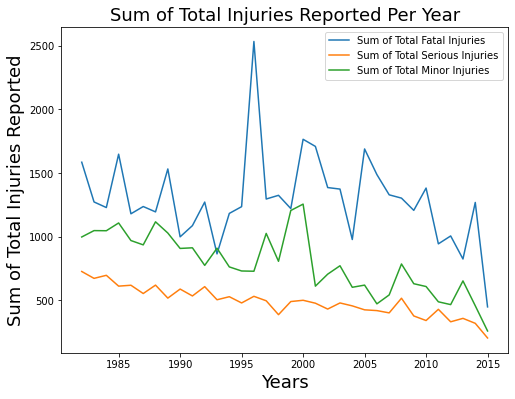

In [26]:
# Create a line plot for counting the injuries (fatal and non-fatal) in each year 
plt.plot(TotalFatalInjuries_df.index, TotalFatalInjuries_df['sum'], label='Sum of Total Fatal Injuries')
plt.plot(TotalSeriousInjuries_df.index, TotalSeriousInjuries_df['sum'], label='Sum of Total Serious Injuries')
plt.plot(TotalMinorInjuries_df.index, TotalMinorInjuries_df['sum'], label='Sum of Total Minor Injuries')

plt.xlabel('Years', size=18)
plt.ylabel('Sum of Total Injuries Reported', size=18)
plt.title('Sum of Total Injuries Reported Per Year', size=18)
plt.legend()
plt.savefig('7.injeriesallyears.png', dpi=300)

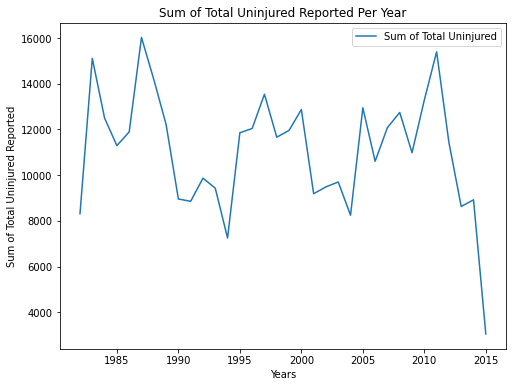

In [27]:
plt.plot(TotalUninjured_df.index, TotalUninjured_df['sum'], label='Sum of Total Uninjured')

plt.xlabel('Years')
plt.ylabel('Sum of Total Uninjured Reported')
plt.title('Sum of Total Uninjured Reported Per Year')
plt.legend()
plt.savefig('8.Uninjuredallyears.png', dpi=300)

In [28]:
# Make a pivot table around Flight_Months
pd.pivot_table(AviationData_df,index=['Flight_Month'])

,Flight_Year,Latitude,Longitude,NumberOfEngines,TotalFatalInjuries,TotalMinorInjuries,TotalSeriousInjuries,TotalUninjured
Flight_Month,,,,,,,,
1,1996.244189,35.451859,-91.936157,1.242468,1.015546,0.477205,0.345258,7.484561
2,1996.023276,35.158067,-92.525168,1.209670,0.886967,0.485802,0.293120,6.796273
3,1996.269590,36.421167,-93.137109,1.181378,0.637844,0.428641,0.281111,6.449823
4,1996.283870,37.205699,-93.120338,1.150903,0.651041,0.489544,0.304732,5.458069
5,1996.370638,37.797109,-94.788462,1.127360,0.670379,0.445532,0.272516,5.153233
6,1996.500599,38.950372,-95.472986,1.113279,0.608450,0.480117,0.286415,5.777512
7,1996.431073,39.556269,-95.154612,1.097660,0.755781,0.559691,0.309141,4.478745
8,1996.276114,39.831260,-96.336113,1.104320,0.763050,0.544092,0.335604,5.359558
9,1996.123183,39.748481,-96.282975,1.123504,0.767953,0.446446,0.296751,4.545440


In [29]:
# creat diffrent pivot table for injuries columns and month
TotalFatalInjuries_m_df = pd.pivot_table(AviationData_df2,index=['Flight_Month'],values=['TotalFatalInjuries'],aggfunc=[np.sum, np.min, np.mean, np.max, len])
TotalFatalInjuries_m_df

,sum,amin,mean,amax,len
,TotalFatalInjuries,TotalFatalInjuries,TotalFatalInjuries,TotalFatalInjuries,TotalFatalInjuries
Flight_Month,,,,,
1,3201.0,0.0,1.015546,169.0,4345.0
2,2974.0,0.0,0.886967,189.0,4597.0
3,2663.0,0.0,0.637844,239.0,5883.0
4,2972.0,0.0,0.651041,138.0,6429.0
5,3551.0,0.0,0.670379,206.0,7479.0
6,3555.0,0.0,0.608212,228.0,8341.0
7,4997.0,0.0,0.755290,295.0,9306.0
8,4845.0,0.0,0.762152,228.0,8747.0


In [30]:
temp_df3 = pd.DataFrame(TotalFatalInjuries_m_df['len'], TotalFatalInjuries_m_df.index)
temp_df3

,TotalFatalInjuries
Flight_Month,
1,4345.0
2,4597.0
3,5883.0
4,6429.0
5,7479.0
6,8341.0
7,9306.0
8,8747.0
9,7087.0


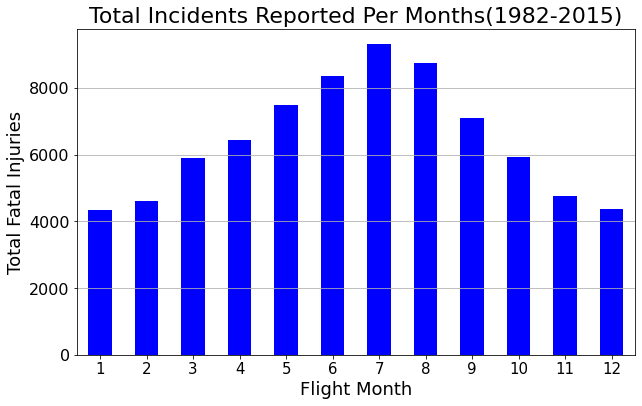

In [31]:
plt.rcParams["figure.figsize"] = [10, 6]

temp_df3.plot(kind='bar', color='blue', legend=None).grid(axis='y')
plt.xticks(rotation=0, size =15)
plt.yticks(rotation=0, size =16)
plt.xlabel('Flight Month', size=18)
plt.ylabel('Total Fatal Injuries', size=18)
plt.title('Total Incidents Reported Per Months(1982-2015)', size=22)
plt.savefig('9.Incidents_month.png', dpi=300)

In [26]:
temp_df4 = pd.DataFrame(TotalFatalInjuries_m_df['sum'], TotalFatalInjuries_m_df.index)
temp_df4

,TotalFatalInjuries
Flight_Month,
1,3201.0
2,2974.0
3,2663.0
4,2972.0
5,3551.0
6,3555.0
7,4997.0
8,4845.0
9,4021.0


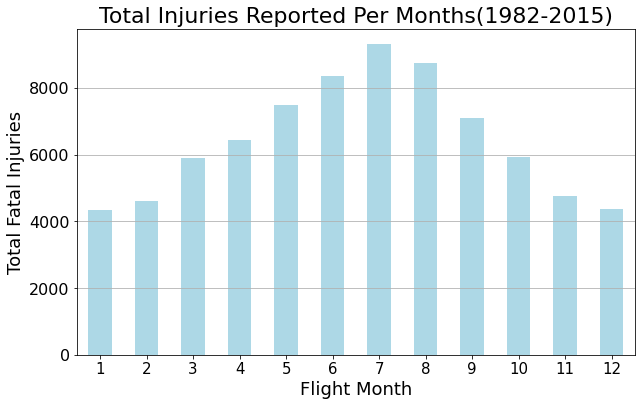

In [32]:
plt.rcParams["figure.figsize"] = [10, 6]

temp_df3.plot(kind='bar', color='lightblue', legend=None).grid(axis='y')
plt.xticks(rotation=0, size =15)
plt.yticks(rotation=0, size =16)
plt.xlabel('Flight Month', size=18)
plt.ylabel('Total Fatal Injuries', size=18)
plt.title('Total Injuries Reported Per Months(1982-2015)', size=22)
plt.savefig('10.Injuries_month.png', dpi=300)

### B. Present graphs for some of the categorical variables 

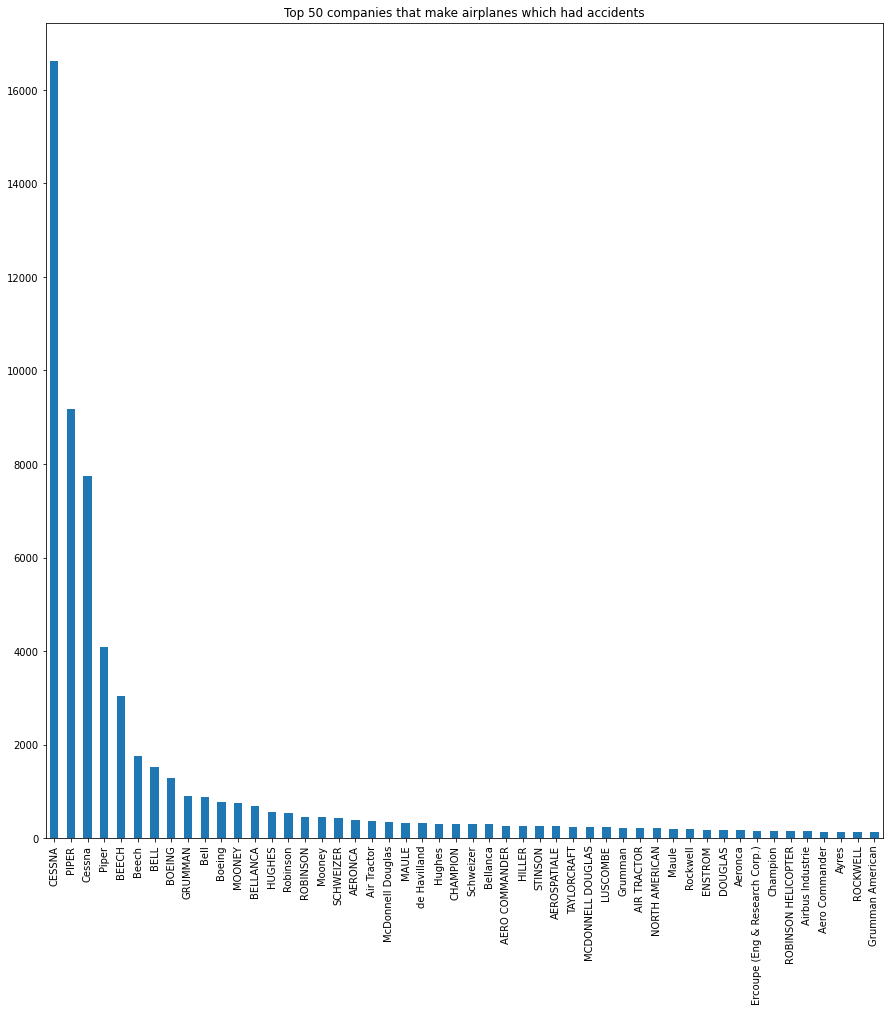

In [33]:
# Plot the top 50 factory that makes airplain 
AviationData_df['Make'].value_counts()[:50].plot(kind='bar',figsize = (15,15), title='Top 50 companies that make airplanes which had accidents')
plt.savefig('11.Top 50 companies that make airplanes.png', dpi=300)

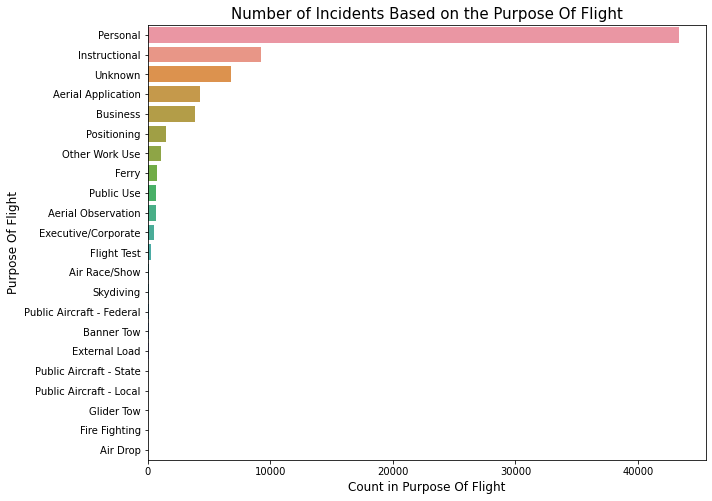

In [34]:
plt.figure(figsize=(10,8))
# or we can use simpler version by using countplot at seaborn
p = sb.countplot(data=AviationData_df, y = 'PurposeOfFlight',
                order=AviationData_df['PurposeOfFlight'].value_counts().index)

# set labels
plt.xlabel("Count in Purpose Of Flight", size=12)
plt.ylabel("Purpose Of Flight", size=12)
plt.title("Number of Incidents Based on the Purpose Of Flight", size=15)
plt.savefig("12.PurposeOfFlight.png", dpi=300)

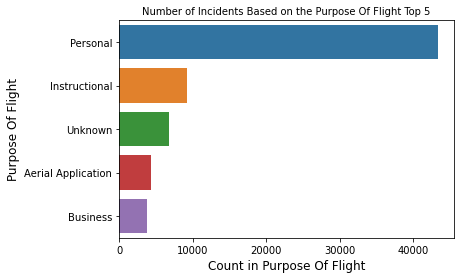

In [35]:
plt.figure(figsize=(6,4))
# or we can use simpler version by using countplot at seaborn
p = sb.countplot(data=AviationData_df, y = 'PurposeOfFlight',
                order=AviationData_df['PurposeOfFlight'].value_counts().iloc[:5].index)

# set labels
plt.xlabel("Count in Purpose Of Flight", size=12)
plt.ylabel("Purpose Of Flight", size=12)
plt.title("Number of Incidents Based on the Purpose Of Flight Top 5", size=10)
plt.savefig("13.PurposeOfFlight_top5.png", dpi=300)

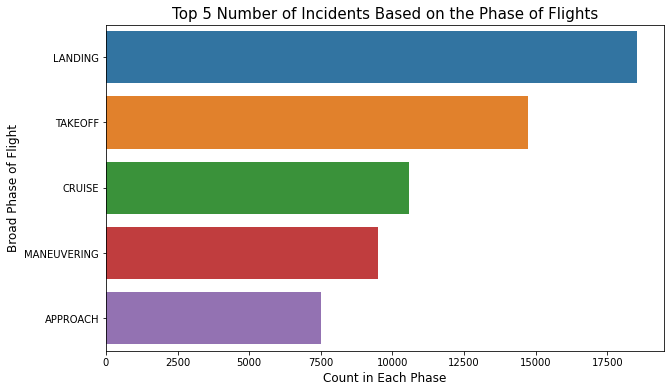

In [36]:
# or we can use simpler version by using countplot at seaborn
p = sb.countplot(data=AviationData_df, y = 'BroadPhaseOfFlight',
                order=AviationData_df['BroadPhaseOfFlight'].value_counts().iloc[:5].index)
# set labels
plt.xlabel("Count in Each Phase", size=12)
plt.ylabel("Broad Phase of Flight", size=12)
plt.title("Top 5 Number of Incidents Based on the Phase of Flights", size=15)
plt.savefig("14.Top5_BroadPhaseOfFlight.png", dpi=300)

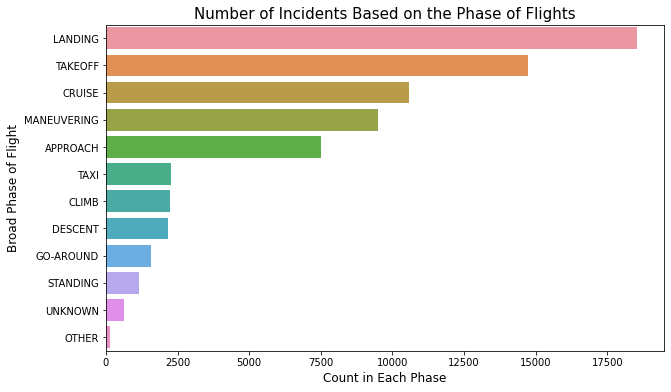

In [37]:
# or we can use simpler version by using countplot at seaborn
p = sb.countplot(data=AviationData_df, y = 'BroadPhaseOfFlight',
                order=AviationData_df['BroadPhaseOfFlight'].value_counts().index)
# set labels
plt.xlabel("Count in Each Phase", size=12)
plt.ylabel("Broad Phase of Flight", size=12)
plt.title("Number of Incidents Based on the Phase of Flights", size=15)
plt.savefig("15.BroadPhaseOfFlight.png", dpi=300)

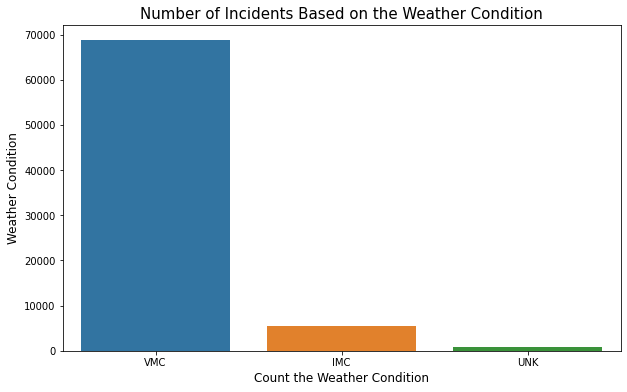

In [40]:
# or we can use simpler version by using countplot at seaborn
p = sb.countplot(data=AviationData_df, x = 'WeatherCondition',
                order=AviationData_df['WeatherCondition'].value_counts().index)
# set labels
plt.xlabel("Count the Weather Condition", size=12)
plt.ylabel("Weather Condition", size=12)
plt.title("Number of Incidents Based on the Weather Condition", size=15)
plt.savefig("16.WeatherCondition.png", dpi=300)

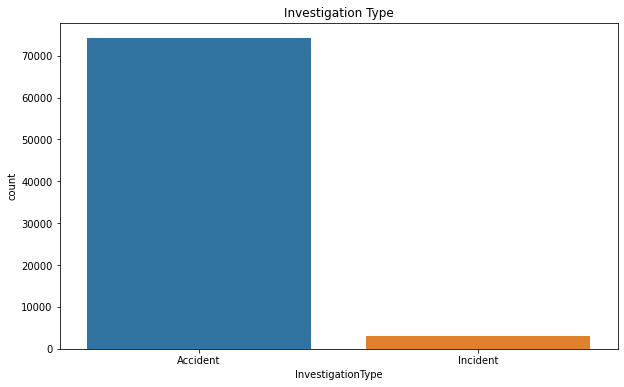

In [41]:
sb.countplot(x= AviationData_df["InvestigationType"])
plt.title("Investigation Type")
plt.savefig("17.InvestigationType.png", dpi=300)

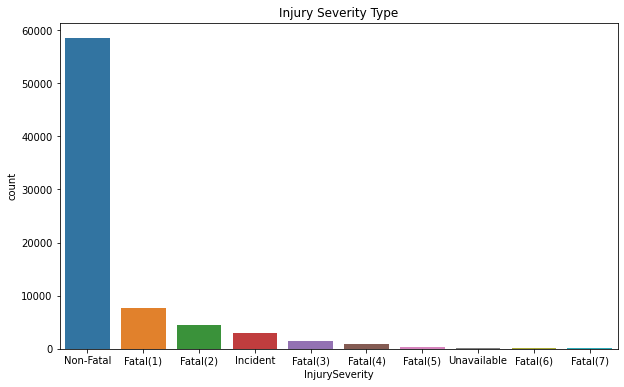

In [42]:
sb.countplot(x= AviationData_df["InjurySeverity"],
            order=AviationData_df['InjurySeverity'].value_counts().iloc[:10].index)
plt.title("Injury Severity Type")
plt.savefig("18.Injury Severity Type top10.png", dpi=300)

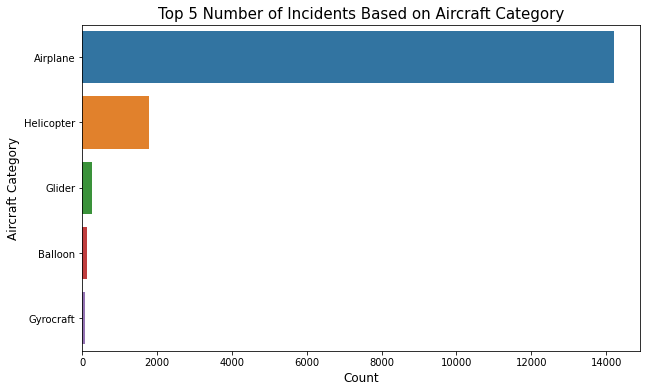

In [43]:
# or we can use simpler version by using countplot at seaborn
p = sb.countplot(data=AviationData_df, y = 'AircraftCategory',
                order=AviationData_df['AircraftCategory'].value_counts().iloc[:5].index)
# set labels
plt.xlabel("Count", size=12)
plt.ylabel("Aircraft Category", size=12)
plt.title("Top 5 Number of Incidents Based on Aircraft Category", size=15)
plt.savefig("19.Top5_AircraftCategory.png", dpi=300)

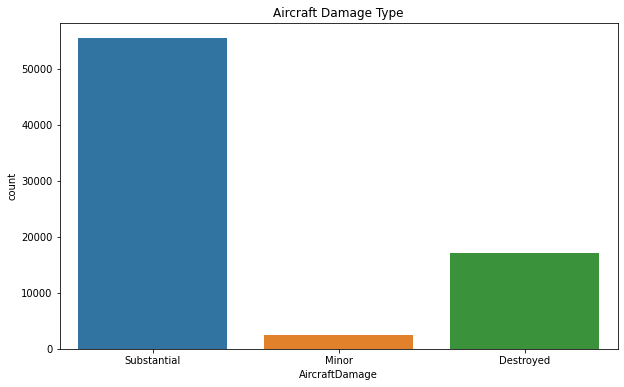

In [44]:
sb.countplot(x= AviationData_df["AircraftDamage"])
plt.title("Aircraft Damage Type")
plt.savefig("20.Aircraft Damage Type.png", dpi=300)

### C. Use mapping tools in python to visualize variables based on location

In [46]:
World_map = gpd.read_file(r'D:\RTI_Exercise\data-scientist-exercise02-master\Shapefile\World.shp')

In [47]:
geometry = [Point(xy) for xy in zip(AviationData_df["Longitude"], AviationData_df["Latitude"])]

In [48]:
geo_df = gpd.GeoDataFrame(AviationData_df, crs = 'EPSG: 4326', geometry = geometry)
geo_df.head()

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate,Flight_Year,Flight_Month,geometry
0,20150901X74304,Accident,GAA15CA244,2015-09-01,"Truckee, CA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Preliminary,NaT,2015,9,POINT (nan nan)
1,20150901X92332,Accident,CEN15LA392,2015-08-31,"Houston, TX",United States,29.809444,-95.668889,IWS,WEST HOUSTON,...,NaN,NaN,2.0,VMC,LANDING,Preliminary,2015-09-04,2015,8,POINT (-95.669 29.809)
2,20150902X61853,Accident,GAA15CA246,2015-08-30,"New Milford, CT",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Preliminary,NaT,2015,8,POINT (nan nan)
3,20150901X02521,Accident,GAA15CA243,2015-08-30,"New Enterprise, PA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Preliminary,NaT,2015,8,POINT (nan nan)
4,20150831X61356,Accident,GAA15CA242,2015-08-29,"MIDLOTHIAN, TX",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Preliminary,NaT,2015,8,POINT (nan nan)


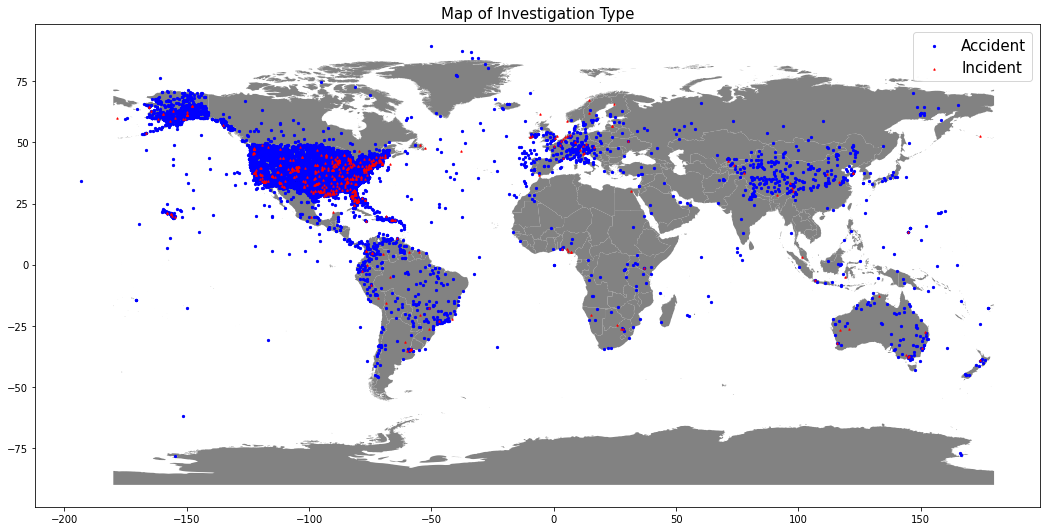

In [50]:
fig,ax = plt.subplots(figsize = (18,12))
World_map.plot(ax = ax, alpha = 5.0, color="grey")
geo_df[geo_df['InvestigationType'] == "Accident"].plot(ax = ax, markersize = 5, color = "blue", marker = "o", label = "Accident")
geo_df[geo_df['InvestigationType'] == "Incident"].plot(ax = ax, markersize = 2, color = "red", marker = "^", label = "Incident")
plt.legend(prop={'size': 15})
plt.title("Map of Investigation Type", size=15)
plt.savefig("21.InvestigationType_Map.png", dpi=600)

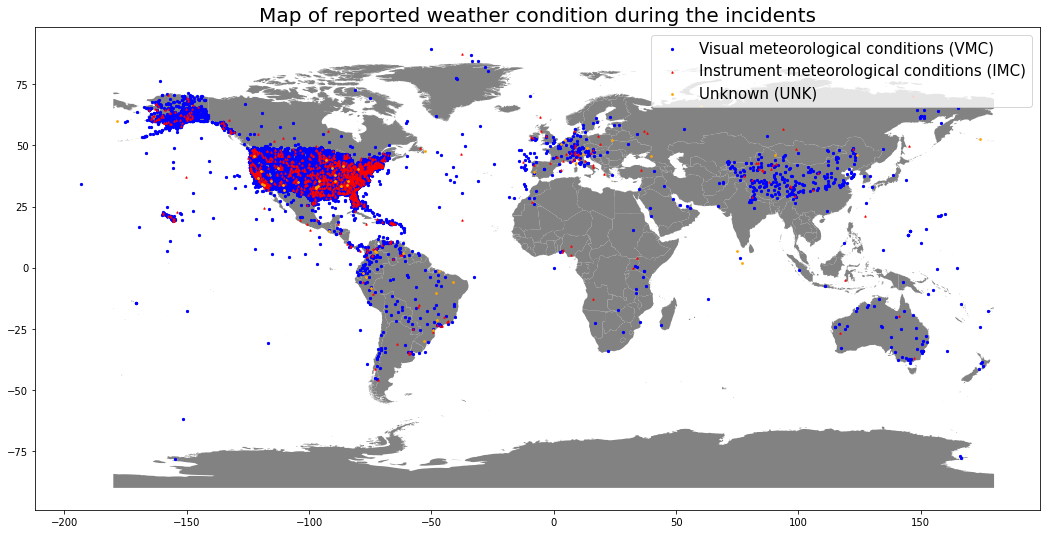

In [51]:
fig,ax = plt.subplots(figsize = (18,12))
World_map.plot(ax = ax, alpha = 5.0, color="grey")
geo_df[geo_df['WeatherCondition'] == "VMC"].plot(ax = ax, markersize = 5, color = "blue", marker = "o", label = "Visual meteorological conditions (VMC)")
geo_df[geo_df['WeatherCondition'] == "IMC"].plot(ax = ax, markersize = 2, color = "red", marker = "^", label = "Instrument meteorological conditions (IMC)")
geo_df[geo_df['WeatherCondition'] == "UNK"].plot(ax = ax, markersize = 3, color = "orange", marker = "o", label = "Unknown (UNK)")
plt.legend(prop={'size': 15}, loc = 1)
plt.title("Map of reported weather condition during the incidents", size=20)
plt.savefig("22.WeatherCondition_Map.png", dpi=800)

=======================================================================================================================

# Part 2: Exploratory data analysis and natural language processing on JSON files

## Step 0: Loading JSON files and Converting it to a Panda dataframe

In [ ]:
import json

In [52]:
json_df = []
df_col=['EventId','narrative','probable_cause']
json_df = pd.DataFrame(columns = df_col)
json_df.head

<bound method NDFrame.head of Empty DataFrame
Columns: [EventId, narrative, probable_cause]
Index: []>

In [53]:
for filename in os.listdir(os.getcwd()):
    if filename.startswith("N"):
        with open(filename) as read_file:
            r_json = json.load(read_file)
            tmp_json_df = pd.DataFrame(r_json['data'])
        json_df = json_df.append(tmp_json_df)

In [54]:
json_df.shape

(76133, 3)

In [55]:
# replace empty values with numpy nan
json_df = json_df.replace('',np.nan)

In [56]:
# count the number of nan values in each column
print(json_df.isnull().sum())

EventId               0
narrative           228
probable_cause    26344
dtype: int64


In [57]:
# Store columns as a list
col_list2 = list(json_df.columns)
col_list2

['EventId', 'narrative', 'probable_cause']

## Step 1. Some initial Text Analysis and Natural Language Processing

### For the "narrative" column

In [58]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

import nltk
import re 
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = nltk.corpus.stopwords.words('english')

In [59]:
# Remove rows containes NA from the narrative
json_df['narrative'].dropna(inplace=True)
json_df['narrative']

0      NTSB investigators may not have traveled in su...
1      NTSB investigators either traveled in support ...
2      NTSB investigators may not have traveled in su...
3      NTSB investigators may not have traveled in su...
4      NTSB investigators either traveled in support ...
                             ...                        
129    NTSB investigators may not have traveled in su...
130    NTSB investigators may not have traveled in su...
131    NTSB investigators may not have traveled in su...
132    THE AIRPLANE'S RIGHT ENGINE LOST POWER SHORTLY...
133    NTSB investigators may not have traveled in su...
Name: narrative, Length: 75905, dtype: object

### Regular Expressions Preprocessing

In [60]:
# A function for Regular Expressions Preprocessing
def preprocess(text):
    """ This function is for Regular Expressions Preprocessing
         to remove some charachters and also make lowecase etc"""
    clean_data = []
    for x in (text[:]): 
        new_text = re.sub('<.*?>', '', x)   # remove HTML tags
        new_text = re.sub(r'[^\w\s]', '', new_text) # remove punc.
        new_text = re.sub(r'\d+','',new_text)# remove numbers
        new_text = new_text.lower() # lower case, .upper() for upper          
        if new_text != '':
            clean_data.append(new_text)
    return clean_data

In [61]:
# Regular Expressions Preprocessing
regular_ls = preprocess(json_df['narrative'])
print(len(regular_ls))
regular_ls[0]

75905


'ntsb investigators may not have traveled in support of this investigation and used data provided by various sources to prepare this public aircraft accident reportthe accident occurred while the helicopter was supporting firefighting efforts with longline operations two days prior to the accident the division group supervisor divs anchored a colored reflective panel used for indicating landing and drop zones at the accident location  the divs stated that no site assessment was performed at the time of the panel placement because the placement was not intended to be the indicator of the drop zone for blivet deliveries  the terrain in the area consisted of steep slopes and trees varying in height from  to  feet  one day prior to the accident the location of the panel was not changed from the previous day and remained as placed by the divs  the accident helicopter equipped with a footlong line then made the blivet drop within  feet of the panel  the marshaller stated he warned the pilot 

### Make a list of all words

In [62]:
words_ls = [] # an empty list to store all words

# this for loop goes through the above dataframe and makes a list
for string in regular_ls:
    words_ls.extend(string.split())

In [63]:
print(len(words_ls))
print(words_ls[:20]) # top 20 words

10847465
['ntsb', 'investigators', 'may', 'not', 'have', 'traveled', 'in', 'support', 'of', 'this', 'investigation', 'and', 'used', 'data', 'provided', 'by', 'various', 'sources', 'to', 'prepare']


In [64]:
#remove stopwords
words_ls_NSW = [word for word in words_ls if word not in stopwords] 

In [65]:
print(len(words_ls_NSW))
print(words_ls_NSW[:20]) # top 20 words

6251661
['ntsb', 'investigators', 'may', 'traveled', 'support', 'investigation', 'used', 'data', 'provided', 'various', 'sources', 'prepare', 'public', 'aircraft', 'accident', 'reportthe', 'accident', 'occurred', 'helicopter', 'supporting']


In [66]:
freq_dist = nltk.FreqDist(words_ls_NSW)

In [67]:
freq_dist

FreqDist({'pilot': 129757, 'airplane': 117422, 'aircraft': 102942, 'accident': 101943, 'investigation': 72732, 'data': 71446, 'used': 71399, 'ntsb': 69670, 'support': 68509, 'various': 68192, ...})

In [68]:
freq_dist_df = pd.DataFrame(freq_dist.items(), columns=['word', 'frequency'])
freq_dist_df = freq_dist_df.sort_values(by=['frequency'], ascending=False)
freq_dist_df[0:20]

,word,frequency
72,pilot,129757
186,airplane,117422
13,aircraft,102942
14,accident,101943
5,investigation,72732
7,data,71446
6,used,71399
0,ntsb,69670
4,support,68509
9,various,68192


### Creat word clould

In [69]:
# Try with diffrent method
# A function to remove stopwords and make a frequency dataframe 
def re_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

# run the function for the preprocessed Regular Expressions 
regular_ls_nsw = re_stopwords(regular_ls)

#make a dataframe
regular_ls_nsw_df = pd.DataFrame(regular_ls_nsw)

# Calculate the word frequency for the narrative columns after removing the stop words 
wo_fr = []
wo_fr =regular_ls_nsw_df.stack().value_counts()  

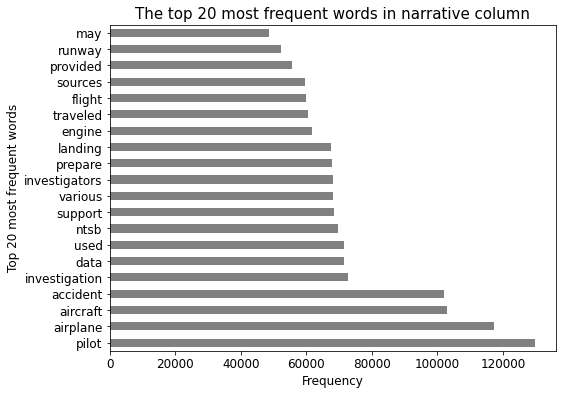

In [92]:
plt.figure(figsize=(8,6))
df = wo_fr[0:20]
df.plot(kind='barh',color='grey')

plt.xticks(rotation=0, size =12)
plt.yticks(rotation=0, size =12)
plt.xlabel("Frequency", size=12)
plt.ylabel("Top 20 most frequent words", size=12)
plt.title("The top 20 most frequent words in narrative column", size=15)
plt.savefig("23.Top20FrequentWord.png", dpi=300)

In [72]:
#Turn all items in a Dataframe to strings
wo_fr_str = wo_fr.to_string() 

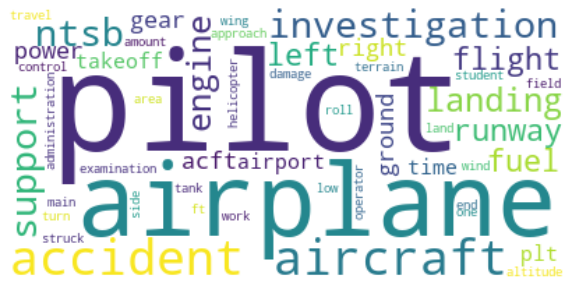

In [74]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white").generate(wo_fr_str)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Save the image in the img folder:
wordcloud.to_file("24.Top50FrequentWordCloud.png")
plt.show()

### Sentence Tokenization

In [75]:
# A Sentence Tokenization function
def tokenization_s(sentences):
    s_new = []
    for sent in (sentences[:]): 
        s_token = sent_tokenize(sent)
        if s_token != '':
            s_new.append(s_token)
    return s_new

In [76]:
tokenization_ls = tokenization_s(json_df['narrative'])
print(len(tokenization_ls))
tokenization_ls

75905


[['NTSB investigators may not have traveled in support of this investigation and used data provided by various sources to prepare this public aircraft accident report.The accident occurred while the helicopter was supporting firefighting efforts with long-line operations.',
  'Two days prior to the accident, the division group supervisor (DIVS) anchored a colored reflective panel used for indicating landing and drop zones at the accident location.',
  'The DIVS stated that no site assessment was performed at the time of the panel placement because the placement was not intended to be the indicator of the drop zone for blivet deliveries.',
  'The terrain in the area consisted of steep slopes and trees varying in height from 75 to 200 feet.',
  'One day prior to the accident, the location of the panel was not changed from the previous day and remained as placed by the DIVS.',
  'The accident helicopter, equipped with a 150-foot-long line, then made the blivet drop within 3 feet of the pa

### Stemming

In [77]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [78]:
#create an object of class PorterStemmer
porter = PorterStemmer() #PorterStemmer uses Suffix Stripping to produce stems
lancaster=LancasterStemmer()

In [79]:
for word in regular_ls_nsw[0]: #A list of words to be stemmed
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

ntsb                ntsb                ntsb                
investigators       investig            investig            
may                 may                 may                 
traveled            travel              travel              
support             support             support             
investigation       investig            investig            
used                use                 us                  
data                data                dat                 
provided            provid              provid              
various             variou              vary                
sources             sourc               sourc               
prepare             prepar              prep                
public              public              publ                
aircraft            aircraft            aircraft            
accident            accid               accid               
reportthe           reportth            reportth            
accident            acci

### Lemmatization

In [80]:
lemmatizer = WordNetLemmatizer()
def lemmatization(words):
    new = []
    lem_words = [lemmatizer.lemmatize(x) for x in (words[:][0])]
    new.append(lem_words)
    return new

In [81]:
lemtest = lemmatization(regular_ls_nsw[:])
print(lemtest)

[['ntsb', 'investigator', 'may', 'traveled', 'support', 'investigation', 'used', 'data', 'provided', 'various', 'source', 'prepare', 'public', 'aircraft', 'accident', 'reportthe', 'accident', 'occurred', 'helicopter', 'supporting', 'firefighting', 'effort', 'longline', 'operation', 'two', 'day', 'prior', 'accident', 'division', 'group', 'supervisor', 'divs', 'anchored', 'colored', 'reflective', 'panel', 'used', 'indicating', 'landing', 'drop', 'zone', 'accident', 'location', 'divs', 'stated', 'site', 'assessment', 'performed', 'time', 'panel', 'placement', 'placement', 'intended', 'indicator', 'drop', 'zone', 'blivet', 'delivery', 'terrain', 'area', 'consisted', 'steep', 'slope', 'tree', 'varying', 'height', 'foot', 'one', 'day', 'prior', 'accident', 'location', 'panel', 'changed', 'previous', 'day', 'remained', 'placed', 'divs', 'accident', 'helicopter', 'equipped', 'footlong', 'line', 'made', 'blivet', 'drop', 'within', 'foot', 'panel', 'marshaller', 'stated', 'warned', 'pilot', 'pro

### For the "probable_cause" column

In [82]:
# Remove rows containes NA from the narrative
json_df['probable_cause'].dropna(inplace=True)
json_df['probable_cause']

0      the pilot's failure to maintain clearance with...
1      The pilot's failure to maintain adequate airsp...
2      FAILURE OF THE FREE TURBINE INTERMEDIATE PINIO...
4      Improper loading of the airplane.  Contributin...
5       THE PILOT'S IMPROPER PREFLIGHT PLANNING/PREPA...
                             ...                        
126    the pilot's misjudged landing approach that le...
127    The pilot's selection of unsuitable terrain fo...
128    The collapse of the left landing gear during l...
129    the pilot's failure to maintain clearance with...
132    the failure of the piston assembly in the numb...
Name: probable_cause, Length: 49789, dtype: object

In [83]:
#Regular Expressions Preprocessing
regular_ls_PC = preprocess(json_df['probable_cause'])
print(len(regular_ls_PC))
regular_ls_PC[0:5]

49789


['the pilots failure to maintain clearance with the trees during a longline operation  contributing factors were the forest services inadequate communication between crews failure to properly assess the safety of the intended drop zone reduced visibility to the right side of the helicopter and the trees',
 'the pilots failure to maintain adequate airspeed which resulted in a stall and subsequent inflight collision with terrain ',
 'failure of the free turbine intermediate pinion driven gear and subsequent disintegration of the free turbine assembly ',
 'improper loading of the airplane  contributing to the accident was the pilots failure to maintain minimum control airspeed ',
 ' the pilots improper preflight planningpreparation ']

In [84]:
# run the function for the preprocessed Regular Expressions 
regular_ls_PC_nsw = re_stopwords(regular_ls_PC)

In [85]:
# show the results
print(len(regular_ls_PC_nsw))
regular_ls_PC_nsw[0]

49789


['pilots',
 'failure',
 'maintain',
 'clearance',
 'trees',
 'longline',
 'operation',
 'contributing',
 'factors',
 'forest',
 'services',
 'inadequate',
 'communication',
 'crews',
 'failure',
 'properly',
 'assess',
 'safety',
 'intended',
 'drop',
 'zone',
 'reduced',
 'visibility',
 'right',
 'side',
 'helicopter',
 'trees']

In [86]:
regular_ls_PC_nsw_df = pd.DataFrame(regular_ls_PC_nsw)
regular_ls_PC_nsw_df.shape

(49789, 146)

In [87]:
# Calculate the word frequency for the probable_cause columns after removing the stop words 
wo_fr2 = []
wo_fr2 =regular_ls_PC_nsw_df.stack().value_counts()  

In [88]:
# The top 20 most frequent words that are used in probable_cause columns 
wo_fr2[0:20]

pilots          32368
failure         28385
landing         19630
maintain        15270
control         13279
loss            13029
resulted        12506
accident        11941
engine          11478
factor          10275
pilot           10204
power            9998
fuel             9623
factors          9265
inadequate       8990
contributing     8565
flight           8545
terrain          8382
improper         8016
due              7558
dtype: int64

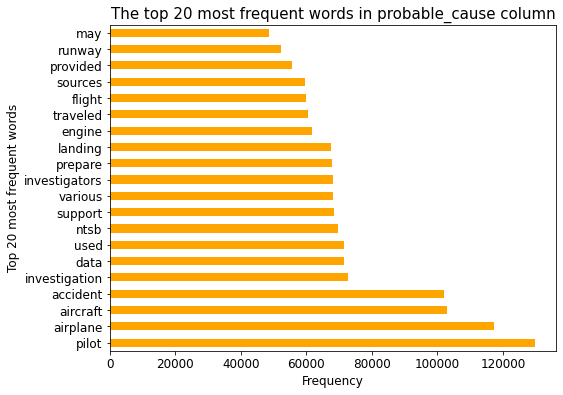

In [91]:
plt.figure(figsize=(8,6))
df2 = wo_fr2[0:20]
df.plot(kind='barh',color='orange')

plt.xticks(rotation=0, size =12)
plt.yticks(rotation=0, size =12)
plt.xlabel("Frequency", size=12)
plt.ylabel("Top 20 most frequent words", size=12)
plt.title("The top 20 most frequent words in probable_cause column", size=15)
plt.savefig("25.Top20FrequentWord_PC.png", dpi=300)

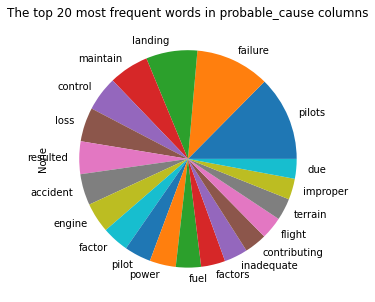

In [94]:
df2.plot.pie(figsize=(5, 5)) # not that much useful 
plt.title("The top 20 most frequent words in probable_cause columns", size=12)

plt.savefig("26.PieTop20FrequentWord_PC.png", dpi=100)

### Creat word clould

In [95]:
#Turn all items in a Dataframe to strings
wo_fr2_str = wo_fr2.to_string() 

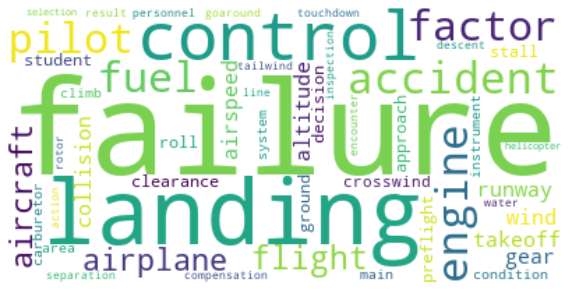

In [97]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white").generate(wo_fr2_str)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Save the image in the img folder:
wordcloud.to_file("27.Top50FrequentWordCloud2.png")
plt.show()

# Part 3: Join the XML and JSON files for further analysis

### Use merge left to joint the XML and JSON Data frames based on "EventId" columns

In [98]:
XML_JSON_df = AviationData_df.merge(json_df, how='left')
XML_JSON_df.shape

(77254, 36)

In [99]:
# Show the first five rows of the data frame
XML_JSON_df.head()

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate,Flight_Year,Flight_Month,geometry,narrative,probable_cause
0,20150901X74304,Accident,GAA15CA244,2015-09-01,"Truckee, CA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Preliminary,NaT,2015,9,POINT (nan nan),NaN,NaN
1,20150901X92332,Accident,CEN15LA392,2015-08-31,"Houston, TX",United States,29.809444,-95.668889,IWS,WEST HOUSTON,...,2.0,VMC,LANDING,Preliminary,2015-09-04,2015,8,POINT (-95.669 29.809),"On August 31, 2015, about 1230 central dayligh...",NaN
2,20150902X61853,Accident,GAA15CA246,2015-08-30,"New Milford, CT",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Preliminary,NaT,2015,8,POINT (nan nan),NaN,NaN
3,20150901X02521,Accident,GAA15CA243,2015-08-30,"New Enterprise, PA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Preliminary,NaT,2015,8,POINT (nan nan),NaN,NaN
4,20150831X61356,Accident,GAA15CA242,2015-08-29,"MIDLOTHIAN, TX",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Preliminary,NaT,2015,8,POINT (nan nan),NaN,NaN


In [100]:
print(XML_JSON_df.columns)

# Store columns as a list
col_list = list(XML_JSON_df.columns)

Index(['EventId', 'InvestigationType', 'AccidentNumber', 'EventDate',
       'Location', 'Country', 'Latitude', 'Longitude', 'AirportCode',
       'AirportName', 'InjurySeverity', 'AircraftDamage', 'AircraftCategory',
       'RegistrationNumber', 'Make', 'Model', 'AmateurBuilt',
       'NumberOfEngines', 'EngineType', 'FARDescription', 'Schedule',
       'PurposeOfFlight', 'AirCarrier', 'TotalFatalInjuries',
       'TotalSeriousInjuries', 'TotalMinorInjuries', 'TotalUninjured',
       'WeatherCondition', 'BroadPhaseOfFlight', 'ReportStatus',
       'PublicationDate', 'Flight_Year', 'Flight_Month', 'geometry',
       'narrative', 'probable_cause'],
      dtype='object')


### Do some analysis for most recent incidents from 2010 - 2015

In [101]:
most_recent_df = XML_JSON_df[(XML_JSON_df['Flight_Year'] > 2010) & (XML_JSON_df['Flight_Year'] <= 2015)]

In [103]:
# Remove rows containes NA from the narrative
most_recent_df['narrative'].dropna(inplace=True)

In [104]:
# Regular Expressions Preprocessing
regular_ls_recent = preprocess(most_recent_df['narrative'])
print(len(regular_ls_recent))
regular_ls_recent[0]

7677


'on august   about  central daylight time a cessna t airplane ncs made a forced landing after departure from the west houston airport iws houston texas the flight instructor and private pilot under instruction were not injured the airplane sustained substantial damage the airplane was registered to h aviation llc and operated by the west houston airport as a  code of federal regulations part  instructional flight visual meteorological conditions prevailed and the flight was operated an in instrument flight rules ifr flight plan the local flight was originating at the time of the accident according to the flight instructor they were performing the last touchand go landing they had just departed from iws and were about  ft above the ground when the engine experienced a loss of power the flight instructor conducted a forced landing into a field beyond the departure end of the runway the airplane landed and continued into trees where it came to rest upright the airplane has been retained f

In [105]:
words_ls_recent = [] # an empty list to store all words

# this for loop goes through the above dataframe and makes a list
for string in regular_ls_recent:
    words_ls_recent.extend(string.split())

In [106]:
print(len(words_ls_recent))
print(words_ls_recent[:20]) # top 20 words

1496721
['on', 'august', 'about', 'central', 'daylight', 'time', 'a', 'cessna', 't', 'airplane', 'ncs', 'made', 'a', 'forced', 'landing', 'after', 'departure', 'from', 'the', 'west']


In [107]:
#remove stopwords
words_ls_NSW2 = [word for word in words_ls_recent if word not in stopwords] 

In [108]:
print(len(words_ls_NSW2))
print(words_ls_NSW2[:20]) # top 20 words

861087
['august', 'central', 'daylight', 'time', 'cessna', 'airplane', 'ncs', 'made', 'forced', 'landing', 'departure', 'west', 'houston', 'airport', 'iws', 'houston', 'texas', 'flight', 'instructor', 'private']


In [125]:
freq_dist_recent_df = nltk.FreqDist(words_ls_NSW2)
print(len(freq_dist_recent_df))

23033


In [110]:
freq_dist_recent_df = pd.DataFrame(freq_dist_recent_df.items(), columns=['word', 'frequency'])
freq_dist_recent_df = freq_dist_recent_df.sort_values(by=['frequency'], ascending=False)
freq_dist_recent_df[0:20]

,word,frequency
5,airplane,24173
19,pilot,21151
16,flight,12401
45,accident,11789
54,engine,9573
9,landing,8971
62,runway,6897
109,reported,6862
209,aircraft,6822
421,data,6552


### Do some analysis for 2000 to 2005

In [111]:
Yr2000_df = XML_JSON_df[(XML_JSON_df['Flight_Year'] > 2000) & (XML_JSON_df['Flight_Year'] <= 2055)]

In [112]:
# Remove rows containes NA from the narrative
Yr2000_df['narrative'].dropna(inplace=True)

In [113]:
# Regular Expressions Preprocessing
regular_ls_Yr2000 = preprocess(Yr2000_df['narrative'])
print(len(regular_ls_Yr2000))
regular_ls_Yr2000[0]

27214


'on august   about  central daylight time a cessna t airplane ncs made a forced landing after departure from the west houston airport iws houston texas the flight instructor and private pilot under instruction were not injured the airplane sustained substantial damage the airplane was registered to h aviation llc and operated by the west houston airport as a  code of federal regulations part  instructional flight visual meteorological conditions prevailed and the flight was operated an in instrument flight rules ifr flight plan the local flight was originating at the time of the accident according to the flight instructor they were performing the last touchand go landing they had just departed from iws and were about  ft above the ground when the engine experienced a loss of power the flight instructor conducted a forced landing into a field beyond the departure end of the runway the airplane landed and continued into trees where it came to rest upright the airplane has been retained f

In [114]:
words_ls_Yr2000 = [] # an empty list to store all words

# this for loop goes through the above dataframe and makes a list
for string in regular_ls_Yr2000:
    words_ls_Yr2000.extend(string.split())

In [115]:
print(len(words_ls_Yr2000))
print(words_ls_Yr2000[:20]) # top 20 words

5115551
['on', 'august', 'about', 'central', 'daylight', 'time', 'a', 'cessna', 't', 'airplane', 'ncs', 'made', 'a', 'forced', 'landing', 'after', 'departure', 'from', 'the', 'west']


In [116]:
#remove stopwords
words_ls_NSW3 = [word for word in words_ls_Yr2000 if word not in stopwords] 

In [117]:
print(len(words_ls_NSW3))
print(words_ls_NSW3[:20]) # top 20 words

2933189
['august', 'central', 'daylight', 'time', 'cessna', 'airplane', 'ncs', 'made', 'forced', 'landing', 'departure', 'west', 'houston', 'airport', 'iws', 'houston', 'texas', 'flight', 'instructor', 'private']


In [118]:
freq_dist_recent_df2 = nltk.FreqDist(words_ls_NSW3)

In [119]:
freq_dist_Yr2000_df = pd.DataFrame(freq_dist_recent_df2.items(), columns=['word', 'frequency'])
freq_dist_Yr2000_df = freq_dist_Yr2000_df.sort_values(by=['frequency'], ascending=False)
freq_dist_Yr2000_df[0:20]

,word,frequency
5,airplane,76887
19,pilot,69942
45,accident,44506
16,flight,36416
54,engine,32380
209,aircraft,32156
9,landing,31899
62,runway,28187
421,data,26135
1295,used,24998


#### Observation: The top 20 words are mostly similar from set1: 2000 to 2005  and set2: 2010 to 2015

## Check if certain words appeared more 

In [127]:
print('Frequency of word “sleep” from 1982 to 2015:', freq_dist['sleep'])
print('Frequency of word “sleep” from 2010 to 2015:', freq_dist_recent_df['sleep'])
print('Frequency of word “sleep” from 2000 to 2005:', freq_dist_recent_df2['sleep'])

Frequency of word “sleep” from 1982 to 2015: 189
Frequency of word “sleep” from 2010 to 2015: 48
Frequency of word “sleep” from 2000 to 2005: 135


In [129]:
print('Frequency of word “drunk” from 1982 to 2015:', freq_dist['drunk'])
print('Frequency of word “drunk” from 2010 to 2015:', freq_dist_recent_df['drunk'])
print('Frequency of word “drunk” from 2000 to 2005:', freq_dist_recent_df2['drunk'])

Frequency of word “drunk” from 1982 to 2015: 6
Frequency of word “drunk” from 2010 to 2015: 0
Frequency of word “drunk” from 2000 to 2005: 2
